<a href="https://colab.research.google.com/github/HernanContreras19/ASSIGNAMENTS/blob/main/FFNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 6.- Artificial Neural Network: feedforward.
Raul Hernan Contreras Esparza
1962147
AI Thursday N4



Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8622 - loss: 0.4792 - val_accuracy: 0.9523 - val_loss: 0.1601
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9632 - loss: 0.1208 - val_accuracy: 0.9657 - val_loss: 0.1120
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9771 - loss: 0.0776 - val_accuracy: 0.9700 - val_loss: 0.0953
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9827 - loss: 0.0574 - val_accuracy: 0.9714 - val_loss: 0.0948
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9863 - loss: 0.0434 - val_accuracy: 0.9728 - val_loss: 0.0940
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9893 - loss: 0.0343 - val_accuracy: 0.9728 - val_loss: 0.0971
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9921 - loss: 0.0233 - val_accuracy: 0.9721 - val_loss: 0.1103
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9921 - loss: 0.0236 

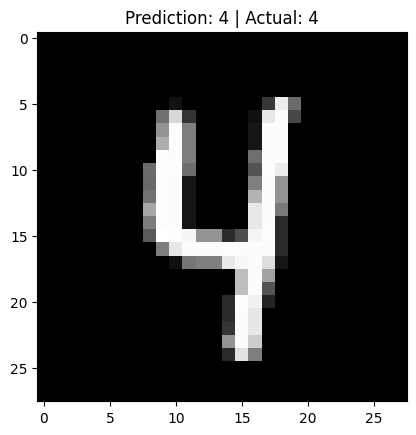

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


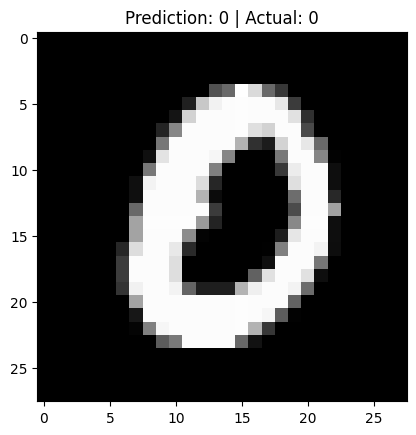

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


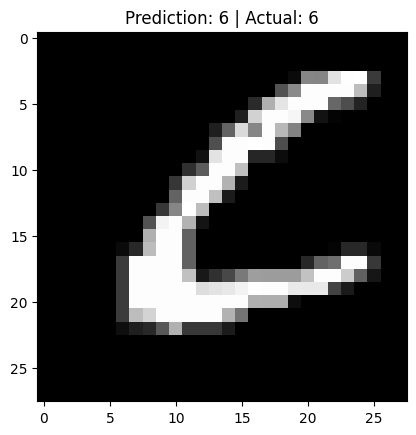

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


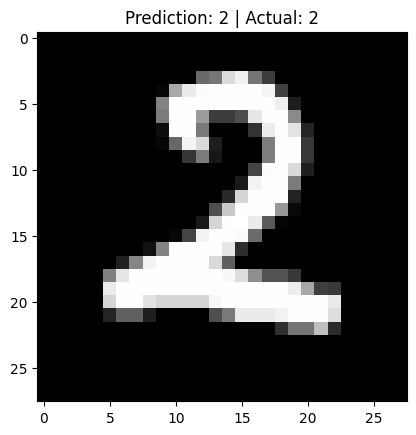

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


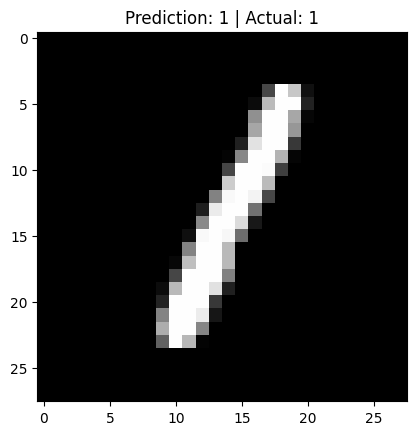

In [2]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

# Load data
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

# Data preprocessing
train_data = train_data / 255.0
test_data = test_data / 255.0
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Model selection and training
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_split=0.2)

# Model testing
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f"\nTest accuracy: {test_accuracy * 100:.2f}%")

# Perform 5 different predictions
sample_indices = np.random.choice(test_data.shape[0], 5, replace=False)
for i, idx in enumerate(sample_indices):
    sample_image = test_data[idx]
    actual_label = np.argmax(test_labels[idx])
    prediction = np.argmax(model.predict(sample_image.reshape(1, 28, 28)))

    plt.imshow(sample_image, cmap='gray')
    plt.title(f"Prediction: {prediction} | Actual: {actual_label}")
    plt.show()
